<a href="https://colab.research.google.com/github/Pvillanueva2/PUBPOL542A/blob/main/Deliverable_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis
Background: There is an ever-increasing of adult living with HIV in developing countries. We gathered data and looking at the HIV prevelanence in countries that have high youth unemployment rate and low education expenditure. We also compare it to the GDP per capita rate of countries.

The Data: the data itself were collected by the CIA World Factbook

# Research Method - Factor Analysis
In order to proceed with data analysis, I want to sue the clustering method to be able to discern the available data in hand. if high youth unemployment rate, low education expenditure, and low GDP per capita rates are high predictor of HIV prevalence in a country then factor analysis should be able to measure similarity among variables

In [ ]:
#clean memory
rm(list = ls())

#link to data file through github
link = "https://github.com/Pvillanueva2/PUBPOL542A/raw/main/allDataClean.csv"
myFile = url(link)

#reading the data
fromPy=read.csv(file = myFile)

#reset indexes to R aparadigm:
row.names(fromPy) = NULL

#check data types
str(fromPy)

'data.frame':	111 obs. of  5 variables:
 $ country         : chr  "Djibouti" "South Africa" "Eswatini" "Costa Rica" ...
 $ unemploymentrate: num  79.9 64.2 50.9 45.4 42.3 41.2 40.4 38.4 37.4 36.9 ...
 $ expenditureratio: num  3.6 6.6 5 6.7 4.5 8.7 9.6 3.2 8.7 4.6 ...
 $ GDPpercapita    : num  4900 13300 8900 21200 3200 14800 9100 13800 2300 37900 ...
 $ HIVrate         : num  0.7 18.3 27.9 0.5 3.8 18.6 11.8 3 20.9 0.3 ...


In [ ]:
install.packages("polycor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Computing the Correlations

In [ ]:
library(polycor)
corMatrix=polycor::hetcor(fromPy)$correlations

data contain one or more character variables
the values of which are ordered alphabetically



In [ ]:
#installing package for ggplot2 and corrplot
install.packages("ggplot2")
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




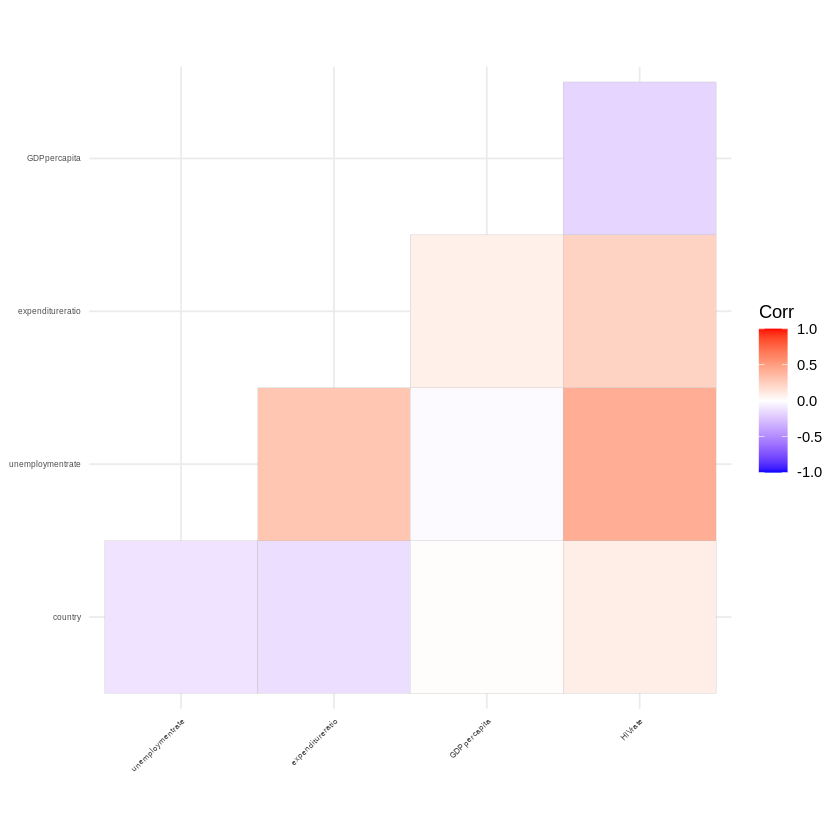

In [ ]:
#visualizing 
library(ggcorrplot)

ggcorrplot(corMatrix, 
           type = "lower") +
          theme(axis.text.x = element_text(size = 5),
                axis.text.y = element_text(size = 5))

# Checking Coditions

In [ ]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The following object is masked from ‘package:polycor’:

    polyserial




In [ ]:
library(psych)
psych::KMO(corMatrix)

Kaiser-Meyer-Olkin factor adequacy
Call: psych::KMO(r = corMatrix)
Overall MSA =  0.53
MSA for each item = 
         country unemploymentrate expenditureratio     GDPpercapita 
            0.36             0.56             0.63             0.39 
         HIVrate 
            0.51 

Testing if correlation matrix not an identity matrix

In [ ]:
cortest.bartlett(corMatrix, n=nrow(fromPy))$p.value>0.05

[1] FALSE

In [ ]:
install.packages("matrixcalc")
library(matrixcalc)
is.singular.matrix(corMatrix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] FALSE

# Compute the Factrors



In [ ]:
install.packages("GPArotation")
library(GPArotation)
resfa <- fa(fromPy[,-1],
            nfactors = 2,
            cor = 'mixed',
            rotate = 'varimax',
            fm="minres")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
print(resfa$loadings, cutoff = 0.5)


Loadings:
                 MR1    MR2   
unemploymentrate  0.647       
expenditureratio              
GDPpercapita             0.503
HIVrate           0.614       

                 MR1   MR2
SS loadings    1.017 0.414
Proportion Var 0.254 0.103
Cumulative Var 0.254 0.358


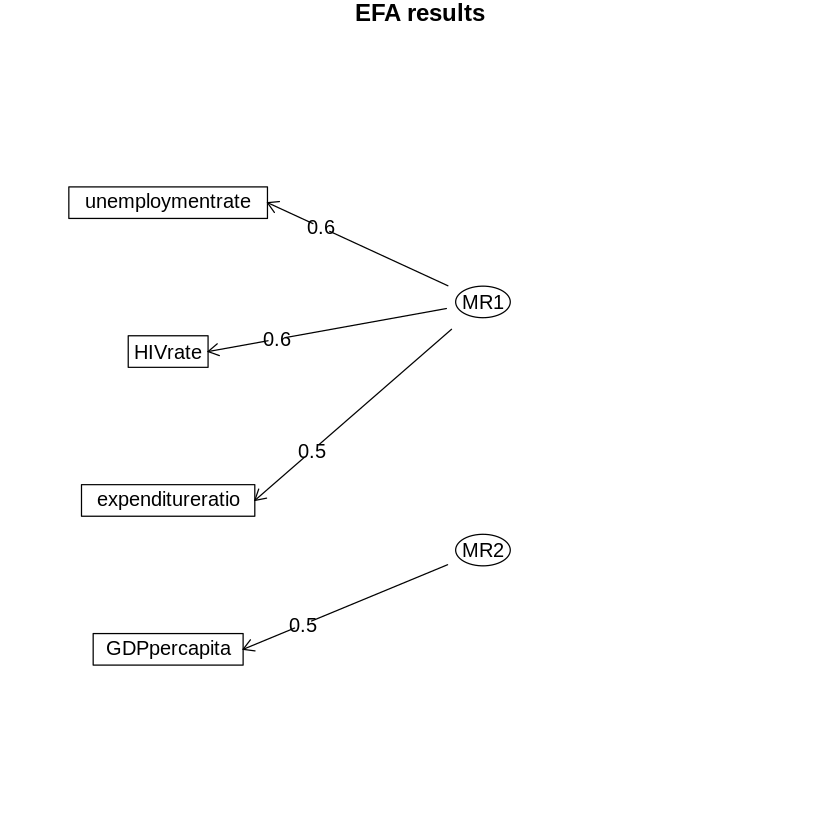

In [ ]:
fa.diagram(resfa, main = "EFA results")

In [ ]:
sort(resfa$communality)

expenditureratio     GDPpercapita unemploymentrate          HIVrate 
       0.2438625        0.2534584        0.4219939        0.5117498

In [ ]:
sort(resfa$complexity)

GDPpercapita unemploymentrate expenditureratio          HIVrate 
        1.000546         1.013418         1.199725         1.635499

# Computing the Scores

In [ ]:
summary(resfa$scores)

      MR1               MR2          
 Min.   :-0.9456   Min.   :-2.08644  
 1st Qu.:-0.4643   1st Qu.:-0.36651  
 Median :-0.1584   Median :-0.05757  
 Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1959   3rd Qu.: 0.27658  
 Max.   : 3.4232   Max.   : 2.05880  

In [ ]:
install.packages("BBmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(BBmisc)
efa_scores=normalize(resfa$scores,
                      method = "range",
                      margin = 2,
                      range = c(0,10))
#saving the scores from data so that we can call column later
fromPy$Fragile_efa=efa_scores[,1]
fromPy$actual_efa=efa_scores[,2]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



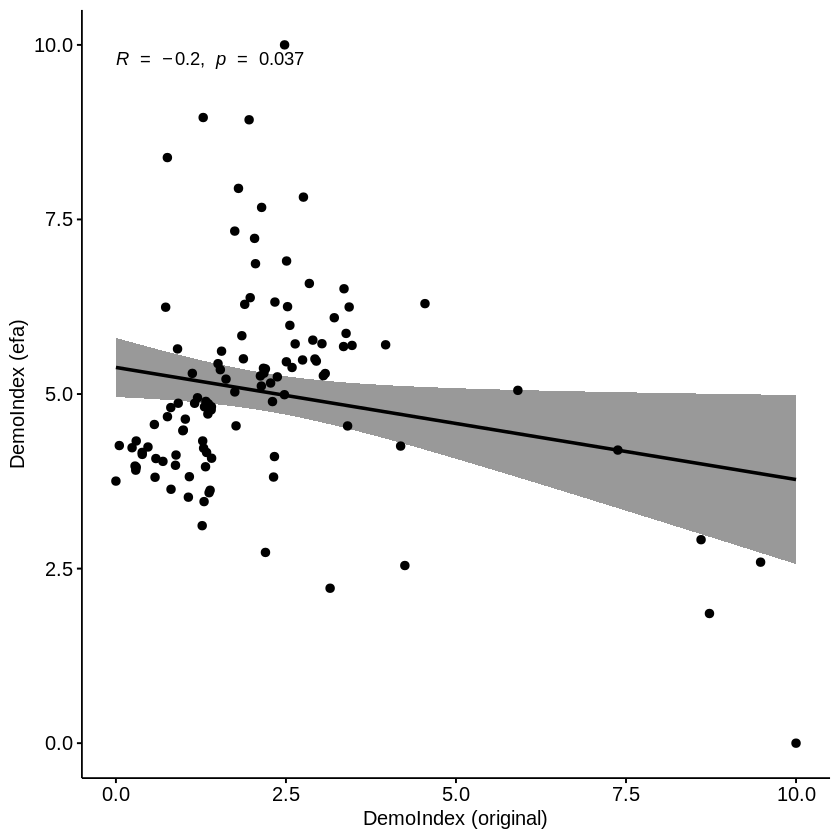

In [ ]:
install.packages("ggpubr")
library(ggpubr)
ggscatter(data=fromPy, x ="Fragile_efa", y = "actual_efa",
          add = "reg.line", conf.int = TRUE,
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "DemoIndex (original)", ylab = "DemoIndex (efa)")

# Running Regression

In [ ]:
str(fromPy, width = 70, strict.width = 'cut')

'data.frame':	111 obs. of  8 variables:
 $ country         : chr  "Djibouti" "South Africa" "Eswatini" "Cos"..
 $ unemploymentrate: num  79.9 64.2 50.9 45.4 42.3 41.2 40.4 38.4 37..
 $ expenditureratio: num  3.6 6.6 5 6.7 4.5 8.7 9.6 3.2 8.7 4.6 ...
 $ GDPpercapita    : num  4900 13300 8900 21200 3200 14800 9100 1380..
 $ HIVrate         : num  0.7 18.3 27.9 0.5 3.8 18.6 11.8 3 20.9 0.3..
 $ Fragile_efa     : num  5.91 9.48 10 4.54 4.19 ...
 $ Demo_efa        : num  5.05 2.59 0 6.29 4.25 ...
 $ actual_efa      : num  5.05 2.59 0 6.29 4.25 ...


In [ ]:
# hypothesis 1: HIVrate is related to the education expenditure
hy1 = formula(Demo_efa~ expenditureratio)

#hypothesis 2: HIVrate is related to unemployment rate
hy2 = formula(Demo_efa~ expenditureratio + unemploymentrate)

#hypothesis 3: HIV rate is related to GDP per capita
hy3 = formula(Demo_efa~ expenditureratio + unemploymentrate + GDPpercapita)

In [ ]:
#results using gaussian

gauss1=glm(hy1,
           data = fromPy,
           family = "gaussian")

gauss2=glm(hy2,
           data = fromPy,
           family ="gaussian")

gauss3=glm(hy3,
           data = fromPy,
           family = "gaussian")

In [ ]:
summary(gauss1)


Call:
glm(formula = hy1, family = "gaussian", data = fromPy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1438  -0.6089  -0.0960   0.4061   4.8562  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.14511    0.36176  11.458  < 2e-16 ***
expenditureratio  0.19974    0.07542   2.648  0.00929 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2.039791)

    Null deviance: 236.64  on 110  degrees of freedom
Residual deviance: 222.34  on 109  degrees of freedom
AIC: 398.11

Number of Fisher Scoring iterations: 2


In [ ]:
summary(gauss2)


Call:
glm(formula = hy2, family = "gaussian", data = fromPy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.5273  -0.7585  -0.1486   0.6010   4.7820  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.30153    0.36805  11.687  < 2e-16 ***
expenditureratio  0.24210    0.07815   3.098  0.00248 ** 
unemploymentrate -0.01935    0.01059  -1.826  0.07059 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.997014)

    Null deviance: 236.64  on 110  degrees of freedom
Residual deviance: 215.68  on 108  degrees of freedom
AIC: 396.74

Number of Fisher Scoring iterations: 2


In [ ]:
summary(gauss3)


Call:
glm(formula = hy3, family = "gaussian", data = fromPy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1917  -0.1111   0.1567   0.3569   1.7595  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.581e+00  2.043e-01  17.526  < 2e-16 ***
expenditureratio  1.806e-01  4.251e-02   4.249  4.6e-05 ***
unemploymentrate -1.498e-02  5.745e-03  -2.607   0.0104 *  
GDPpercapita      5.284e-05  3.270e-06  16.157  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.5860248)

    Null deviance: 236.643  on 110  degrees of freedom
Residual deviance:  62.705  on 107  degrees of freedom
AIC: 261.61

Number of Fisher Scoring iterations: 2


In [ ]:
#seeing r-squared values
install.packages("rsq")
library(rsq)
rsq(gauss1,adj=T); rsq(gauss2, adj=T); rsq(gauss3, adj=T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.05183174

[1] 0.07171597

[1] 0.7275946

In [ ]:
anova(gauss1, gauss2, gauss3, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,109,222.33719,NA,NA,NA
2,108,215.67750,1,6.659694,7.487393e-04
3,107,62.70465,1,152.972852,1.020839e-58


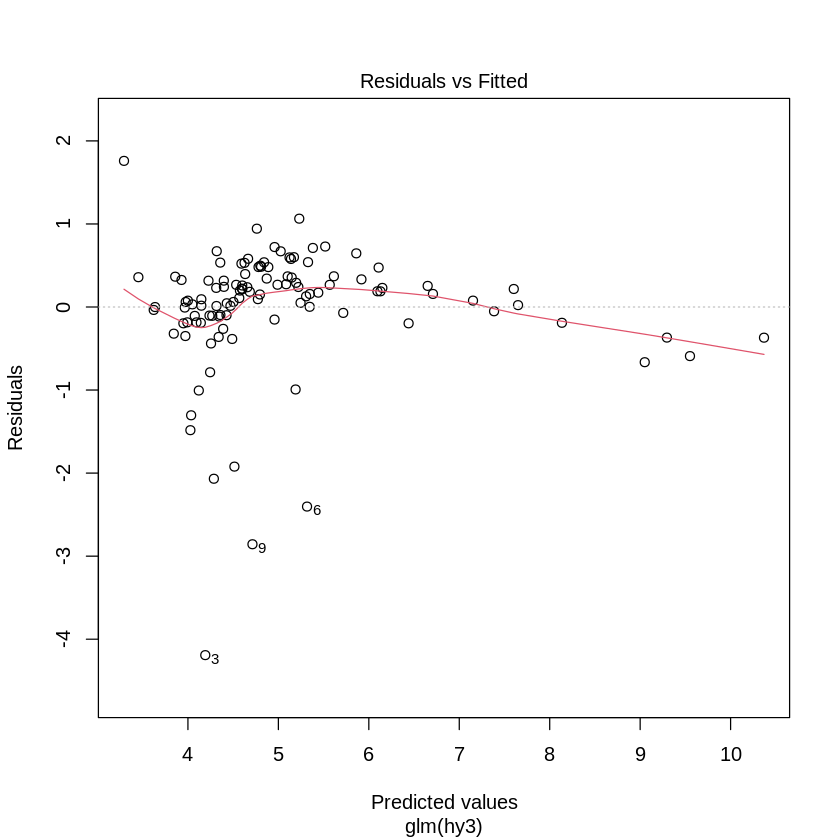

In [ ]:
plot(gauss3,1)

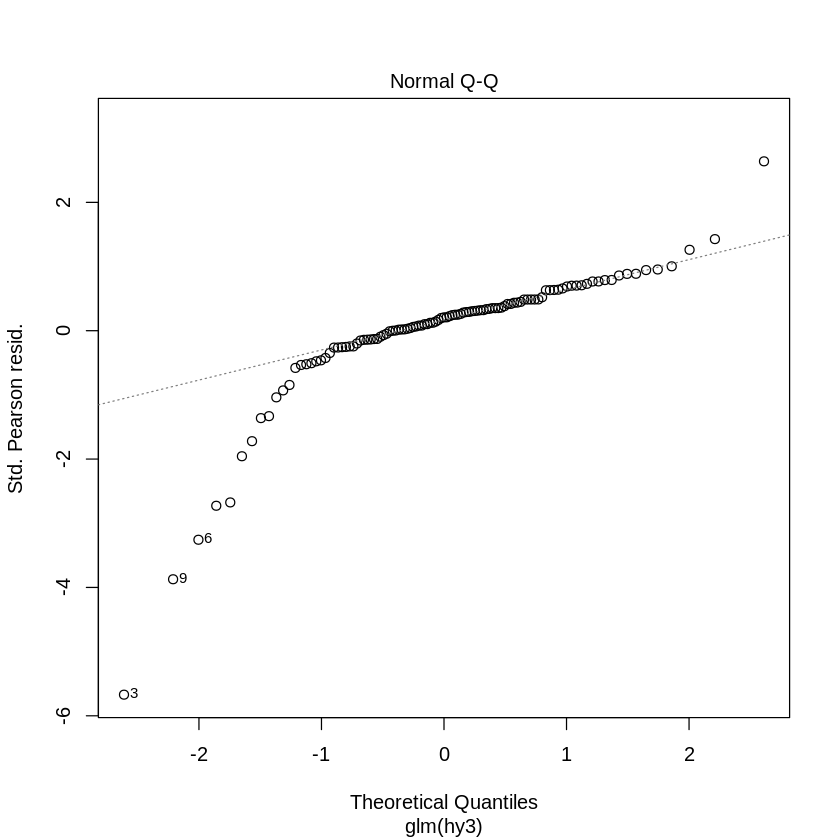

In [ ]:
plot(gauss3, 2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘emmeans’, ‘bayestestR’, ‘datawizard’, ‘effectsize’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




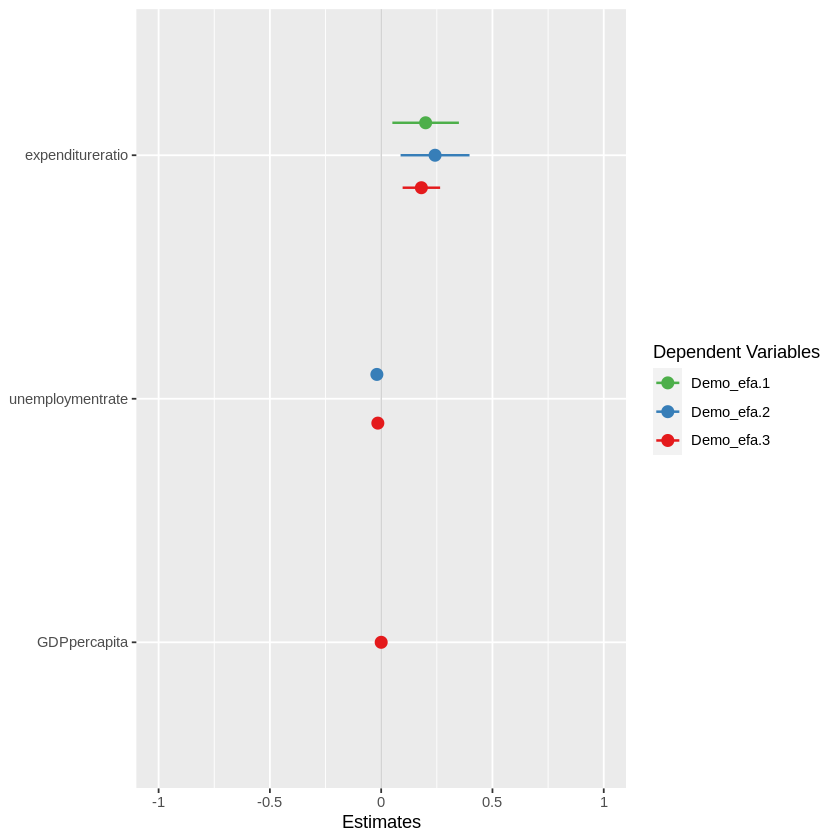

In [ ]:
install.packages("sjPlot")
library(sjPlot)
plot_models(gauss1, gauss2, gauss3, vline.color ="grey")

While doing Factor Analysis, I ran into some problems that one of my column is not numeric, so I didn't analyze country into my factor analysis. The Factor Analysis found that unemployment rate, HIV rate, and education expenditure rate have similarities in variables. By running a regression, you can see how each of these variables are statistically significance with each other. Our Hypothesis is that HIV is related to education expenditure, GDP per capita, and unemployment rate. We found that that they're all statiscally significance with P.value < 2. We can assess that HIV